# Chapter 9

## 9.2. Fundamentals of image processing

### 9.2.2. Image preprocessing

Noise reduction

/Users/julhashkazi/anaconda3/envs/PyBook/lib/python3.11/site-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Users/julhashkazi/anaconda3/envs/PyBook/lib/python3.11/site-packages/scipy/signal/_signaltools.py:1659: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


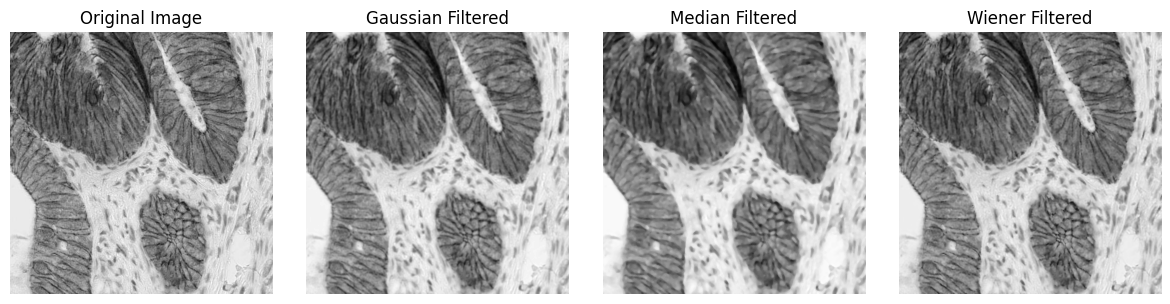

In [1]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color, io
from skimage.filters import median, gaussian
from skimage.morphology import disk
from scipy.signal import wiener
from skimage import io

# Load color image
color_image = io.imread('example_data/ihc.png')

# Convert the color image to grayscale
image = color.rgb2gray(color_image)

# Apply Gaussian filter for noise reduction
gaussian_filtered = gaussian(image, sigma=1)

# Apply Median filter for noise reduction
median_filtered = median(image, disk(3))

# Apply Wiener filter for noise reduction
wiener_filtered = wiener(image)

# Display the original and filtered images
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gaussian_filtered, cmap='gray')
ax[1].set_title('Gaussian Filtered')
ax[1].axis('off')

ax[2].imshow(median_filtered, cmap='gray')
ax[2].set_title('Median Filtered')
ax[2].axis('off')

ax[3].imshow(wiener_filtered, cmap='gray')
ax[3].set_title('Wiener Filtered')
ax[3].axis('off')

plt.tight_layout()
plt.show()


Normalization

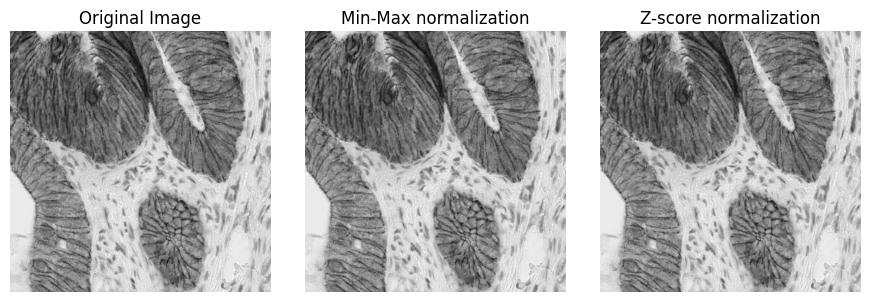

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, color
from skimage import io

# Load color image
color_image = io.imread('example_data/ihc.png')

# Convert the color image to grayscale
image = color.rgb2gray(color_image)

# Min-Max Normalization to scale pixel values between 0 and 1
min_max_normalized = (image - np.min(image)) / (np.max(image) - np.min(image))

# Z-score normalization (mean = 0, std = 1)
z_score_normalized = (image - np.mean(image)) / np.std(image)

# Display original and normalized images
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(min_max_normalized, cmap='gray')
ax[1].set_title('Min-Max normalization')
ax[1].axis('off')

ax[2].imshow(z_score_normalized, cmap='gray')
ax[2].set_title('Z-score normalization')
ax[2].axis('off')

plt.tight_layout()
plt.show()


Contrast enhancement

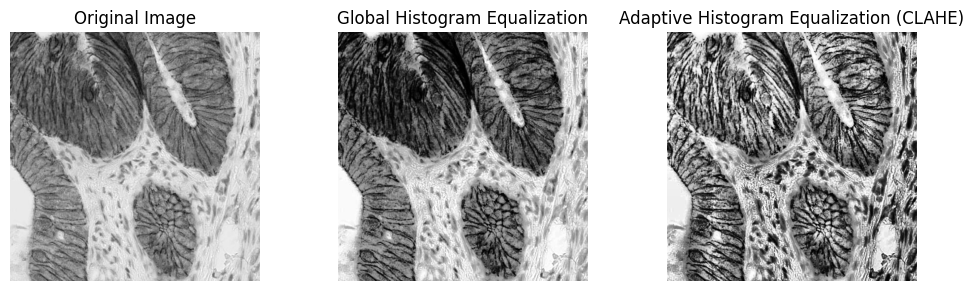

In [3]:
from skimage import exposure, color
import matplotlib.pyplot as plt

from skimage import io

# Load color image
color_image = io.imread('example_data/ihc.png')

# Convert the color image to grayscale
image = color.rgb2gray(color_image)

# Apply global histogram equalization
hist_eq_image = exposure.equalize_hist(image)

# Apply adaptive histogram equalization (CLAHE)
adaptive_eq_image = exposure.equalize_adapthist(image, clip_limit=0.03)

# Display the original, global histogram equalized, and CLAHE results
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(hist_eq_image, cmap='gray')
ax[1].set_title('Global Histogram Equalization')
ax[1].axis('off')

ax[2].imshow(adaptive_eq_image, cmap='gray')
ax[2].set_title('Adaptive Histogram Equalization (CLAHE)')
ax[2].axis('off')

plt.tight_layout()
plt.show()
